# Customer Telecom Dataset

The **Customer Telecom Dataset** provides information on customers, their services, and churn behavior. Each row represents a customer, with columns describing their attributes.

## Key Features

1. **Churn**  
   - Indicates if the customer left in the last month.  
     - *Values*: "Yes" or "No".

2. **Services Subscribed**  
   - **Phone Service**: Has phone service or not.  
   - **Multiple Lines**: Single or multiple lines.  
   - **Internet Service**: Type of internet (DSL, Fiber, etc.).  
   - **Online Security / Backup**: Subscription status.  
   - **Device Protection / Tech Support**: Availability of these services.  
   - **Streaming TV / Movies**: Streaming service subscriptions.

3. **Account Information**  
   - **Tenure**: Months as a customer.  
   - **Contract**: Type (month-to-month, yearly).  
   - **Payment Method**: Mode of payment.  
   - **Paperless Billing**: Opted for paperless or not.  
   - **Monthly Charges**: Current monthly charges.  
   - **Total Charges**: Total amount billed.

4. **Demographics**  
   - **Gender**: Male or Female.  
   - **Partner**: Has a partner or not.  
   - **Dependents**: Has dependents or not.  

---

## Use Cases
- **Churn Analysis**: Identify factors influencing customer churn.  
- **Service Insights**: Understand service subscription trends.  
- **Revenue Analysis**: Assess monthly and total charges.  

This dataset is ideal for **predictive analytics** and churn prediction modeling.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('datasets/telco_customer_churn_dataset.csv')

In [164]:
# creating a copy of the origional dataset for analysis
dfcp = df.copy()

## Data Wrangling

In [165]:
dfcp

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [166]:
dfcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replaceing the blank space with 0 and changing the datatype of TotalCharges to float

In [167]:
dfcp['TotalCharges'] = dfcp['TotalCharges'].replace(' ','0')
dfcp['TotalCharges'] = dfcp['TotalCharges'].astype('float')

In [168]:
dfcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking for NULL values

In [169]:
dfcp.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [170]:
dfcp.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Checking for duplicate values

In [171]:
dfcp['customerID'].duplicated().sum()

0

### Replacing 0 with No, 1 with Yes in seniorCitizen column for better analysis

In [172]:
def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

dfcp['SeniorCitizen'] = dfcp['SeniorCitizen'].apply(conv)

## Exploratory Data Analysis

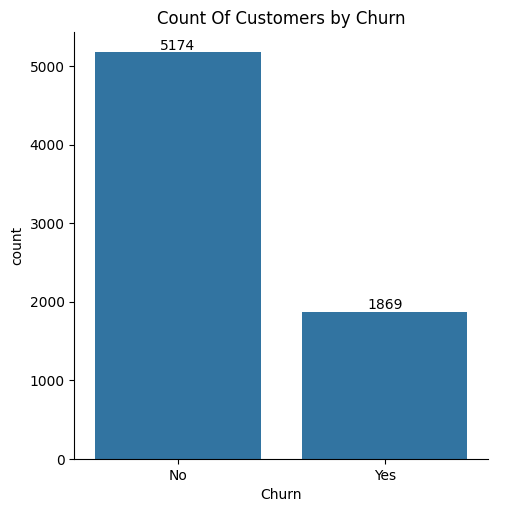

In [173]:
fig = sns.catplot(kind='count',data=dfcp,x='Churn')
ax = fig.ax

for container in ax.containers:
    ax.bar_label(container)
plt.title("Count Of Customers by Churn")

plt.show()


***From the above chart we can say that a total of 5174 customers churned out of 7043 customers provided from the dataset***

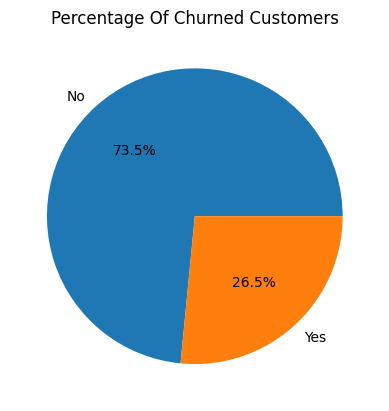

In [174]:
gb = dfcp.groupby(dfcp['Churn']).agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct='%0.1f%%')
plt.title("Percentage Of Churned Customers")
plt.show()

***The above pie chart depicts the percentage of churned customers***

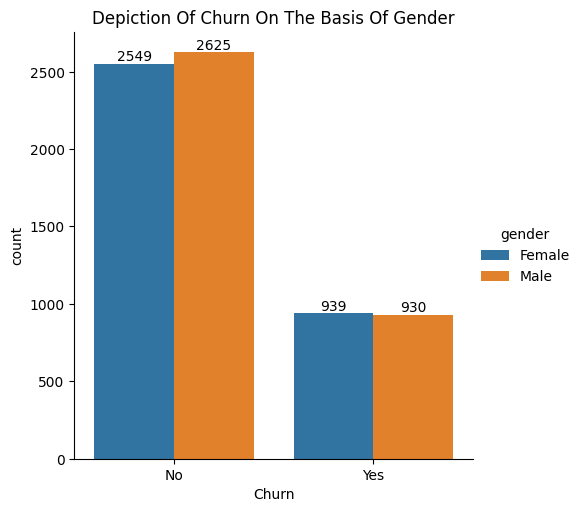

In [175]:
fig = sns.catplot(kind='count',data=dfcp,x='Churn',hue='gender')
ax = fig.ax
plt.title("Depiction Of Churn On The Basis Of Gender")

for container in ax.containers:
    ax.bar_label(container)

- ***The above categorical count plot shows the churned customers analysis on the basis of gender.***
- ***The number of customers who did not churn is significantly higher for both genders, with more female customers not churning than male customers.***
- ***The count of customers who churned is almost identical between the two genders.***
- ***The plot clearly shows that more females did not churn compared to males, as indicated by the taller blue bars in the "No" category***

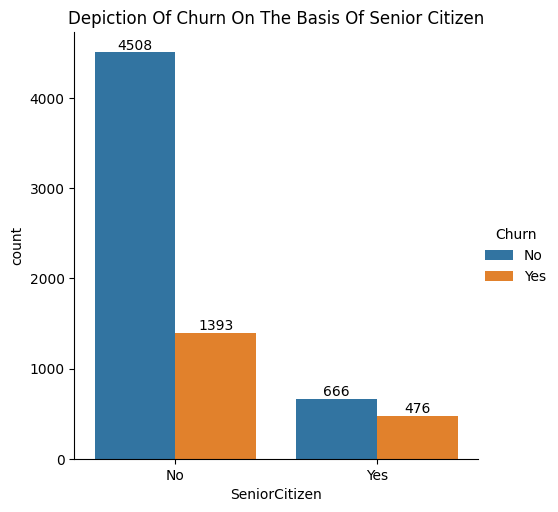

In [176]:
fig = sns.catplot(kind='count',data=dfcp,x='SeniorCitizen',hue='Churn')
ax = fig.ax
plt.title("Depiction Of Churn On The Basis Of Senior Citizen")

for container in ax.containers:
    ax.bar_label(container)

- ***The above count plot shows the churned customers data on the basis of senior citizen category.***
- ***There is a spike of those customers that did not churned and are not senior citizen.***
- ***While people who are senior citizen had almost similar churned data***

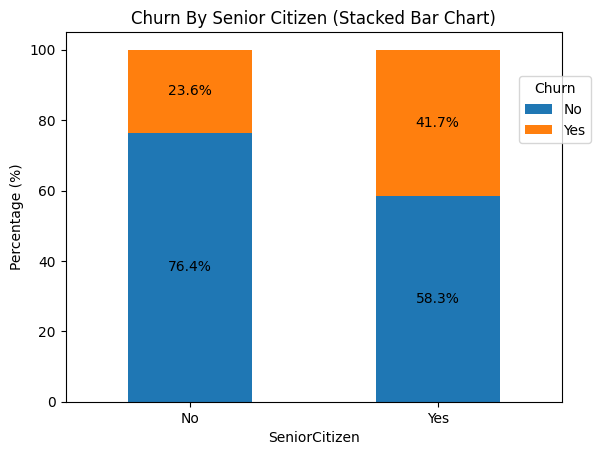

In [191]:
total_counts = dfcp.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots()  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn By Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

Churn Comparison:

- ***Senior citizens have a higher churn rate compared to non-senior customers. 41.7% of senior citizens churned, compared to only 23.6% of non-senior customers.***
- ***This suggests that seniors are more likely to churn than non-senior customers.
Non-Churn Distribution:***

- ***A significant percentage of non-senior customers (76.4%) stayed with the service, indicating they are more likely to remain with the service.***
- ***For senior citizens, 58.3% stayed, which is still relatively high but lower compared to non-senior customers.***



Text(0.5, 1.0, 'Churn Analysis Based Upon The Tenure Of Subscription')

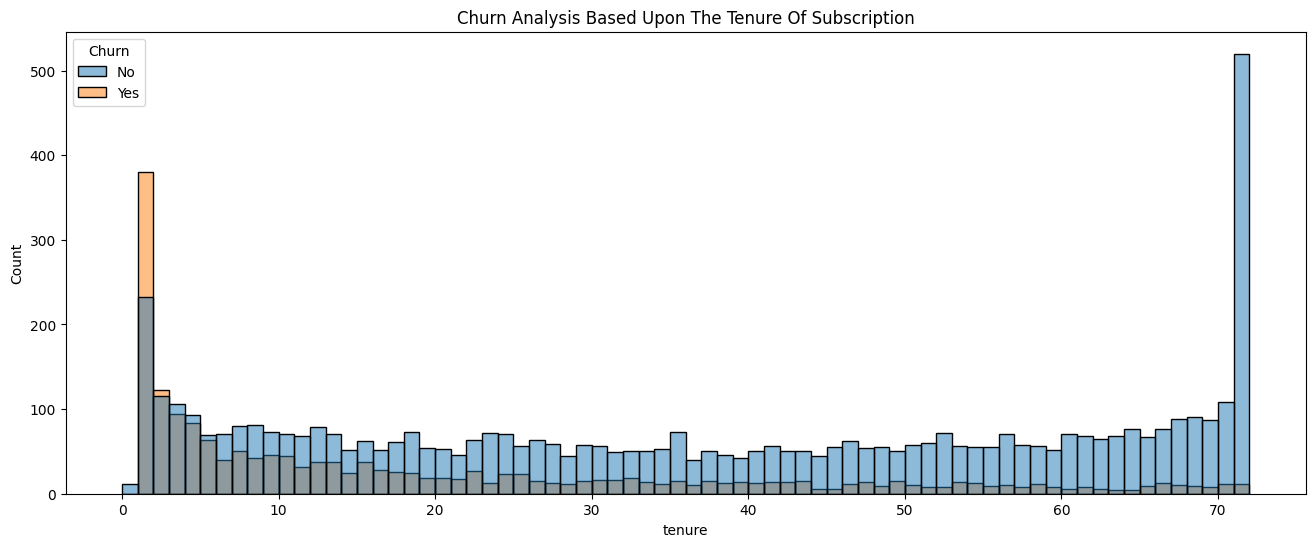

In [190]:
plt.figure(figsize=(16,6))
sns.histplot(x='tenure',data=dfcp,hue='Churn',bins=72)
plt.title('Churn Analysis Based Upon The Tenure Of Subscription')

- ***The spike in the 0 to 5 months tenure range for churned customers suggests that a significant number of customers leave soon after subscribing to the service.***
- ***As the tenure increases (after 5 months), the churn rate seems to stabilize with less churn observed for customers***
- ***This chart suggests that the early months of subscription are critical for customer retention, as many customers tend to churn quickly. However, once they pass this initial period, the likelihood of churn reduces.***

Text(0.5, 1.0, 'Tenure Analysis Based Upon the Gender')

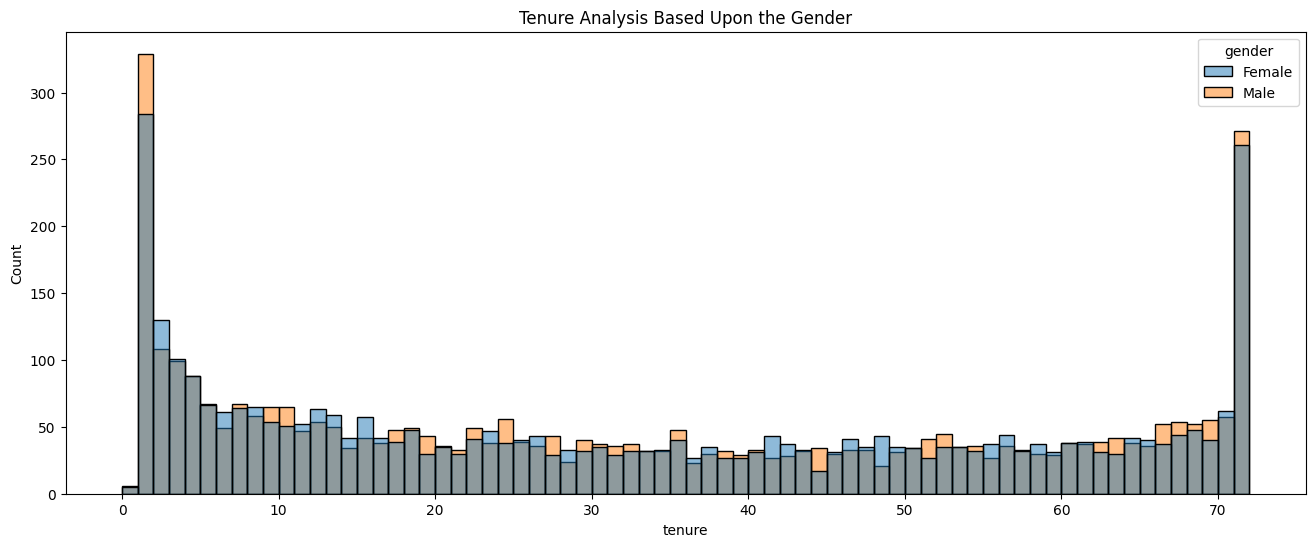

In [196]:
plt.figure(figsize=(16,6))
sns.histplot(x='tenure',data=dfcp,hue='gender',bins=72)
plt.title('Tenure Analysis Based Upon the Gender')

- ***it is observed that males are supposed to be more engaged in shorted tenure thatn women as well as in longest tenures***

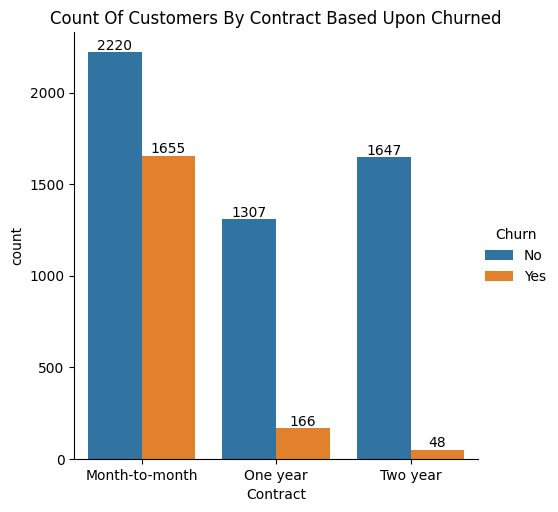

In [188]:
fig = sns.catplot(kind='count',data=dfcp,x='Contract',hue='Churn')
ax = fig.ax

for container in ax.containers:
    ax.bar_label(container)
plt.title("Count Of Customers By Contract Based Upon Churned")

plt.show()


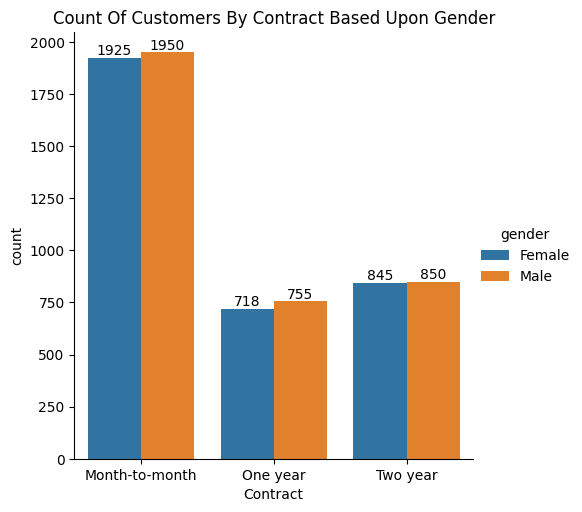

In [187]:
fig = sns.catplot(kind='count',data=dfcp,x='Contract',hue='gender')
ax = fig.ax

for container in ax.containers:
    ax.bar_label(container)
plt.title("Count Of Customers By Contract Based Upon Gender")

plt.show()


- ***From the graph it is observed that males and females botha are engaed to month to month subscription model than one year contract or two year***
- ***clearly males are slightly more engaged in buying the subscription model whether in terms of month subscription model than one year contract or two year***

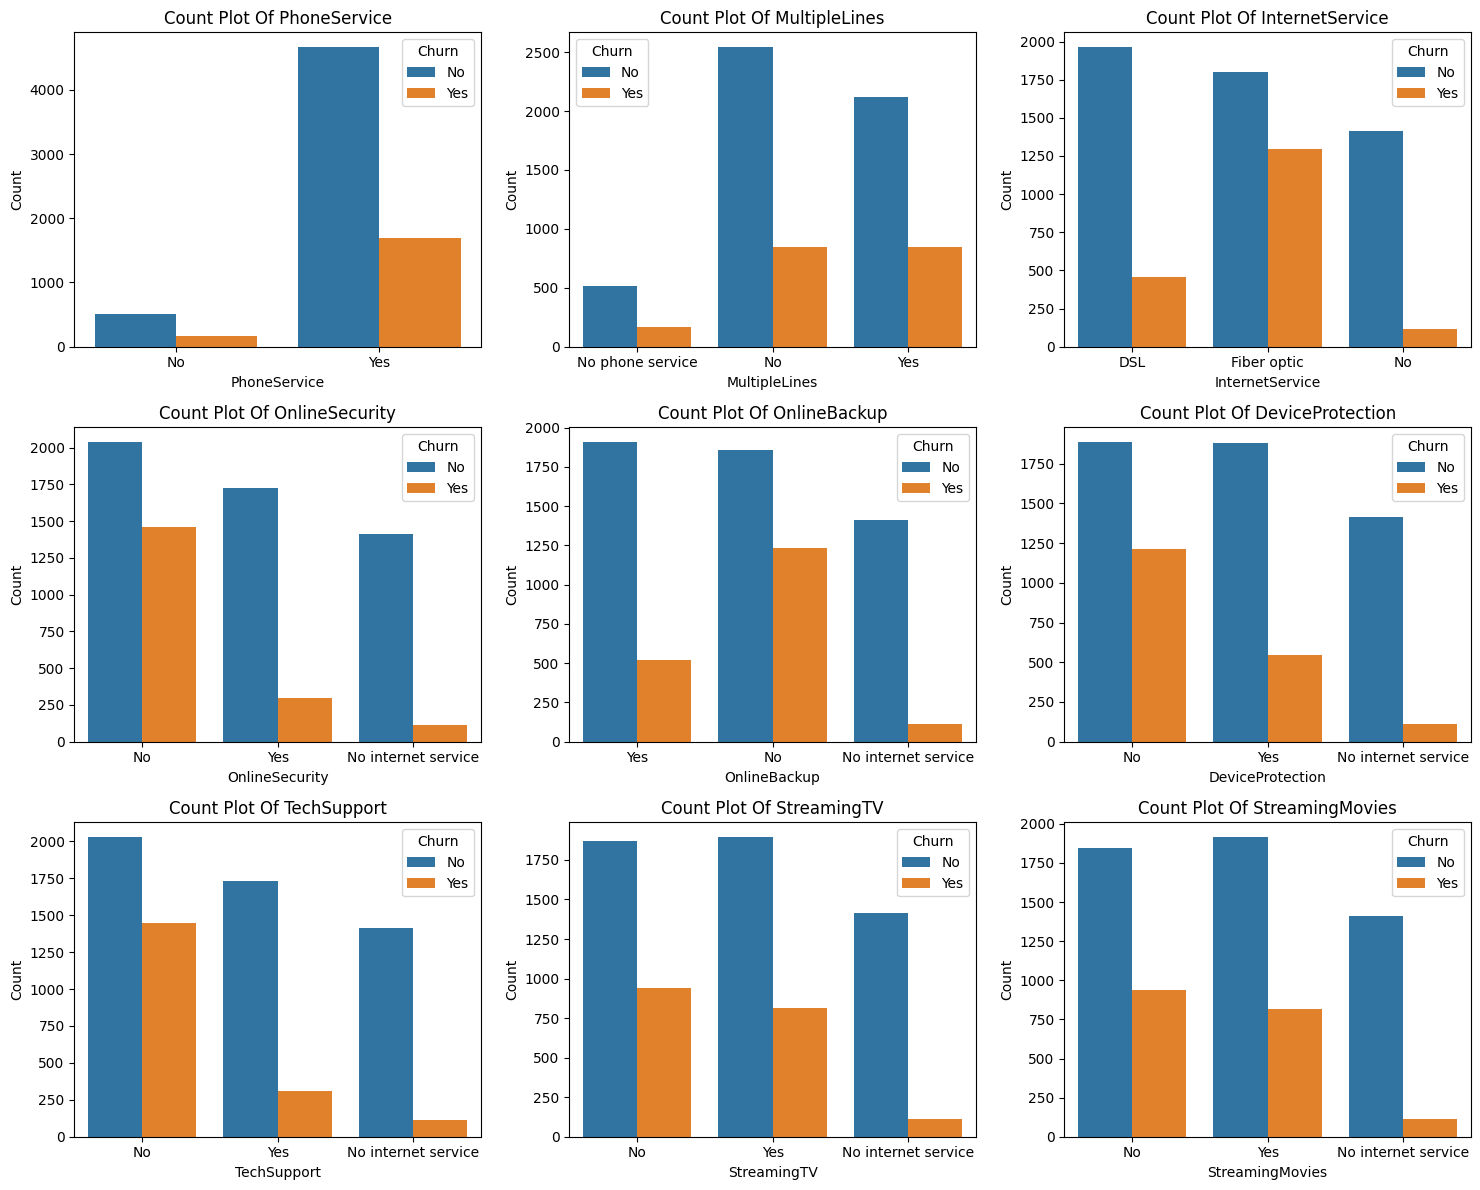

In [193]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot Of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

***The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.***

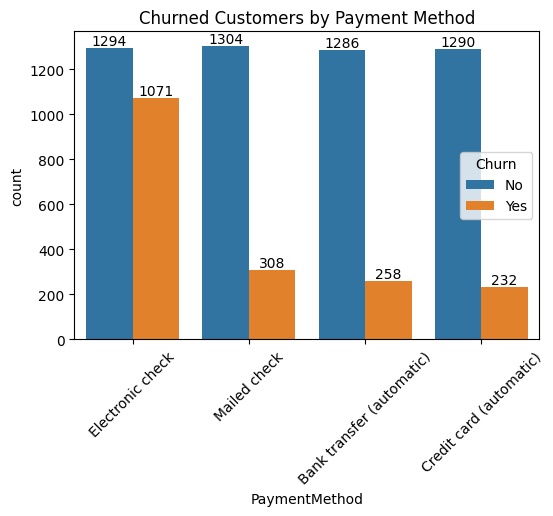

In [183]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

***customer is likely to churn when he is using electronic check as a payment method.***